[[-61.10880196]
 [  3.17267726]]
[[48]
 [50]
 [53]
 [55]
 [61]
 [64]
 [73]] [[ 93]
 [105]
 [102]
 [118]
 [121]
 [135]
 [180]]


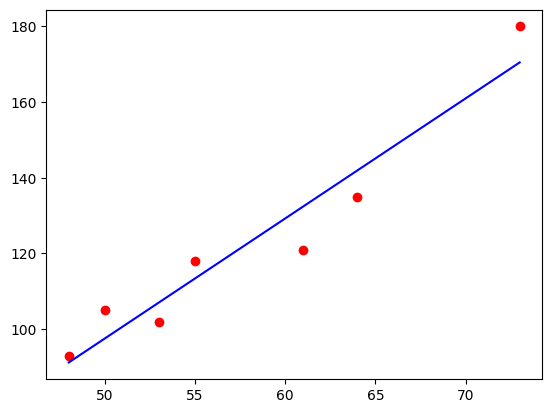

In [43]:
import numpy as np
import matplotlib.pyplot as plt

H = np.matrix([
    [1, 48],
    [1, 50],
    [1, 53],
    [1, 55],
    [1, 61],
    [1, 64],    
    [1, 73] 
])
W = np.matrix([93, 105, 102, 118, 121, 135, 180])
W = np.matrix_transpose(W)

beta = (np.linalg.inv(np.matrix_transpose(H) * H)) * (np.matrix_transpose(H) * W)
print(beta)

data_heights = H[:,1]
data_actual_weight = W[:,0]
print(data_heights, data_actual_weight)

# Plot the data
plt.scatter([data_heights], [data_actual_weight], color='red')

# Plot the regression line
b0 = beta[0, 0]
b1 = beta[1, 0]
plt.plot(data_heights, b0 + b1 * data_heights, color='blue')

plt.show()
